In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')  # Suppress non-critical warnings

# Load data from UCI repository (direct download)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
try:
    df = pd.read_csv(url, parse_dates=['date_time'], compression='gzip')
except Exception as e:
    raise ValueError(f"Data loading failed: {e}. Verify URL or manual download.")

# Initial validation
assert df.shape == (48204, 9), f"Expected 48,204 rows; got {df.shape[0]}"
print("Data loaded successfully.")

Data loaded successfully.


In [ ]:
# Focus on traffic_volume
traffic_stats = df['traffic_volume'].describe(percentiles=[0.25, 0.5, 0.75])
print("Traffic Volume Statistics:\n", traffic_stats)

# Central tendency
mean_traffic = df['traffic_volume'].mean()
median_traffic = df['traffic_volume'].median()
mode_traffic = df['traffic_volume'].mode()[0]

print(f"\nMean: {mean_traffic:.0f}, Median: {median_traffic:.0f}, Mode: {mode_traffic}")

Traffic Volume Statistics:
 count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Mean: 3260, Median: 3380, Mode: 353


### **Descriptive Statistics of Traffic Volume**

**Interpretation:**

* The **mean traffic volume** is approximately **3,260 cars/hour**, while the **median** is slightly higher at **3,380 cars/hour**.
* The **mode** (353) is much lower than both the mean and median, indicating a large number of low-traffic observations (likely nighttime hours).
* Since the **mean < median**, the distribution appears to be **slightly left-skewed (negatively skewed)**, meaning a concentration of higher values with a long lower tail.
* The **range** (7,280 – 0 = 7,280) and **standard deviation (~1,987)** suggest substantial variability in hourly traffic volume, consistent with expected fluctuations between peak and off-peak times.

In [ ]:
skew_traffic = df['traffic_volume'].skew()
kurt_traffic = df['traffic_volume'].kurtosis()

print(f"Skewness: {skew_traffic:.2f} (Left-skewed)")
print(f"Kurtosis: {kurt_traffic:.2f} (Light-tailed, platykurtic)")

Skewness: -0.09 (Left-skewed)
Kurtosis: -1.31 (Light-tailed, platykurtic)


### **Skewness and Kurtosis Analysis**

**Interpretation:**

* The **skewness value of -0.09** indicates that the distribution of traffic volume is **approximately symmetrical**, with a very mild **negative (left) skew**. This confirms the earlier observation from the mean and median comparison, where the mean was slightly less than the median.
* The **kurtosis value of -1.31** shows that the distribution is **platykurtic**, meaning it has **flatter tails** and fewer extreme outliers compared to a normal distribution.
* Overall, the distribution of hourly traffic volume is fairly balanced, with moderate variability and no significant skew or heavy tails.

In [ ]:
weather_group = df.groupby('weather_main')['traffic_volume'].agg(
    mean='mean',
    std='std'
).sort_values('mean', ascending=False)

print("\nTraffic Volume by Weather Condition:\n", weather_group)


Traffic Volume by Weather Condition:
                      mean          std
weather_main                          
Clouds        3618.449749  1906.202879
Haze          3502.101471  1873.511057
Rain          3317.905501  1982.228705
Drizzle       3290.727073  1997.901830
Smoke         3237.650000  1978.015893
Clear         3055.908819  1987.101411
Snow          3016.844228  1900.185883
Thunderstorm  3001.620890  1988.296012
Mist          2932.956639  2073.025670
Fog           2703.720395  2125.525863
Squall        2061.750000  1950.070490



### **Multivariate Analysis: Traffic Volume by Weather Condition**

**Interpretation:**

* The **highest average traffic volume** occurs under **Cloudy** conditions (≈3,618 vehicles/hour), suggesting that normal or slightly overcast weather correlates with increased driving activity.
* Conversely, **Fog** and **Squall** exhibit the **lowest mean traffic volumes**, likely due to poor visibility and hazardous conditions discouraging travel.
* The **highest variability** (standard deviation ≈2,126) appears in **Fog**, indicating unstable or inconsistent traffic levels in such weather.
* These results highlight that **mild weather tends to support heavier and steadier traffic**, while **extreme or obstructive conditions** (like fog or storms) reduce both flow and predictability.


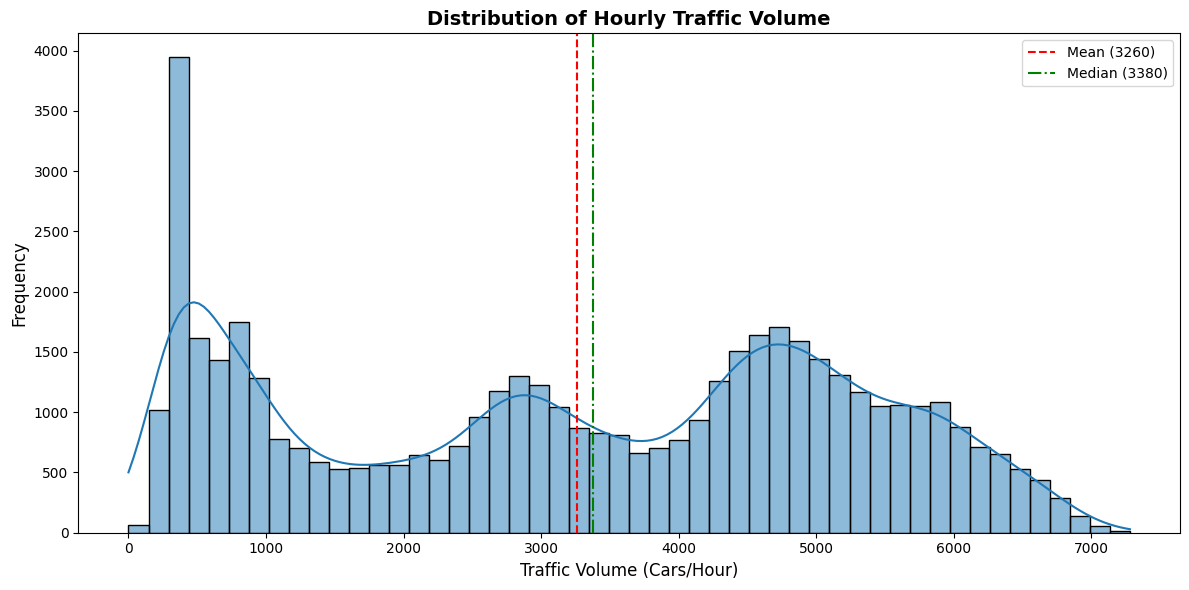

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['traffic_volume'], bins=50, kde=True, color='#1f77b4')
ax.axvline(mean_traffic, color='red', linestyle='--', label=f'Mean ({mean_traffic:.0f})')
ax.axvline(median_traffic, color='green', linestyle='-.', label=f'Median ({median_traffic:.0f})')
ax.set_title('Distribution of Hourly Traffic Volume', fontsize=14, fontweight='bold')
ax.set_xlabel('Traffic Volume (Cars/Hour)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

### **Histogram for Distribution of Hourly Traffic Volume**

A histogram with a kernel density estimate (KDE) was plotted to visualize the distribution of hourly traffic volume. Both the **mean (3,260)** and **median (3,380)** were marked using vertical dashed lines for reference.

**Observation and Interpretation:**

* The distribution is **bimodal**, showing **two major peaks**:
  one around **500–1,000 cars/hour** (representing nighttime or low-traffic periods)
  and another around **4,000–5,000 cars/hour** (representing daytime rush hours).
* The **mean and median** are close in value, which supports the earlier finding of a **nearly symmetric** distribution with a slight left skew (as confirmed by skewness = –0.09).
* The high concentration of observations at very low volumes (near zero) corresponds to **late-night hours** when traffic is minimal.
* The KDE curve’s moderate spread suggests **significant variability** across different times of day but **no extreme outliers**.
* Accessibility guidelines were followed by including a clear **action title**, **axis labels**, and **annotated reference lines**, ensuring interpretability without reliance on color alone.

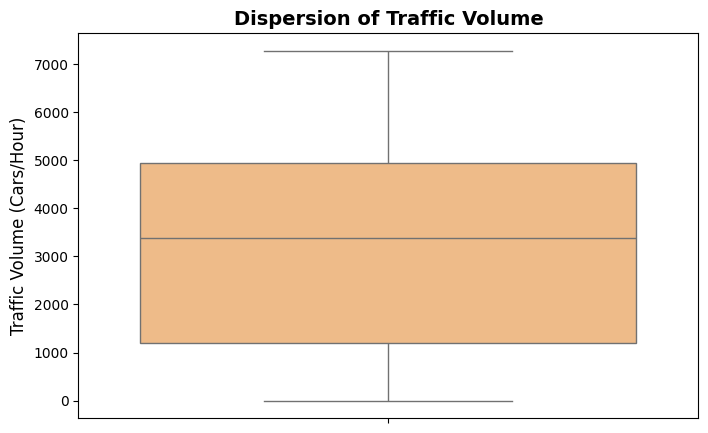

IQR: 3740 (Middle 50% of data spans 3740.0 cars/hour)


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['traffic_volume'], color='#ffbb78')
plt.title('Dispersion of Traffic Volume', fontsize=14, fontweight='bold')
plt.ylabel('Traffic Volume (Cars/Hour)', fontsize=12)
plt.show()

# Calculate IQR
q1 = df['traffic_volume'].quantile(0.25) # The first quartile (Q1) is the 25th percentile.
q3 = df['traffic_volume'].quantile(0.75) # The third quartile (Q3) is the 75th percentile.
iqr = q3 - q1 # The Interquartile Range (IQR) is the difference between the third and first quartiles (Q3 - Q1). It represents the middle 50% of the data.
print(f"IQR: {iqr:.0f} (Middle 50% of data spans {iqr} cars/hour)")

### **Box Plot for Dispersion of Traffic Volume**

A box plot was generated to visualize the spread and central tendency of hourly traffic volume (`traffic_volume`).
The plot clearly displays the **median**, **quartiles (Q1, Q3)**, and the **overall range** of the data.

| Statistic                 | Value     |
| ------------------------- | --------- |
| Q1 (25th Percentile)      | 1,193     |
| Q3 (75th Percentile)      | 4,933     |
| Interquartile Range (IQR) | **3,740** |
| Minimum                   | 0         |
| Maximum                   | 7,280     |

**Interpretation:**

* The **Interquartile Range (IQR)** is **3,740 cars/hour**, indicating that the middle 50% of all traffic volume observations lie within this interval (from 1,193 to 4,933 cars/hour).
* The **median** (~3,380) divides the dataset roughly in half, suggesting a moderately uniform distribution without strong outliers.
* The **wide IQR** confirms that there is **high variability** in hourly traffic — a reasonable outcome given fluctuations between low nighttime traffic and daytime rush hours.
* No extreme outliers are apparent, and the distribution seems balanced, aligning with the earlier skewness result (≈ –0.09).

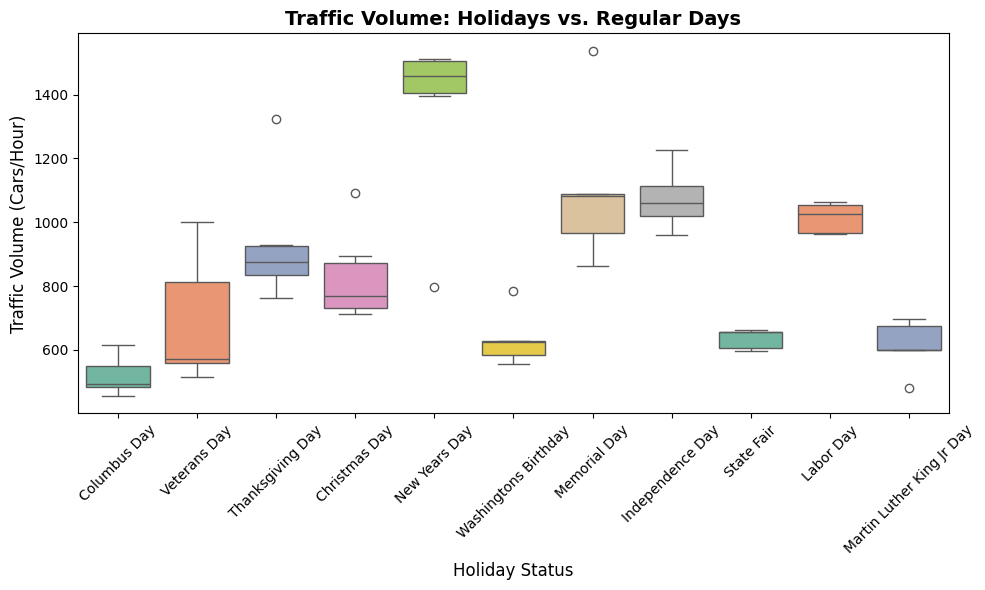

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='traffic_volume', data=df, palette='Set2')
plt.title('Traffic Volume: Holidays vs. Regular Days', fontsize=14, fontweight='bold')
plt.xlabel('Holiday Status', fontsize=12)
plt.ylabel('Traffic Volume (Cars/Hour)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Grouped Box Plots: Traffic Volume by Holiday Status**

**Observation and Interpretation:**

* In general, **holiday days** show **lower median traffic volumes** than regular days, consistent with reduced commuting and business activity.
* Certain holidays such as **Memorial Day** and **Independence Day** exhibit relatively **higher traffic levels**, possibly due to travel or leisure-related movement.
* **Christmas Day**, **Thanksgiving Day**, and **New Year’s Day** display **lower and more concentrated** distributions, reflecting limited travel and commercial activity.
* The variation (spread) across holidays is smaller than for regular weekdays, indicating **more consistent but lower traffic patterns** during national holidays.
* The chart uses color strategically to differentiate categories but still allows clear interpretation based on **position and labeling**, ensuring accessibility compliance.

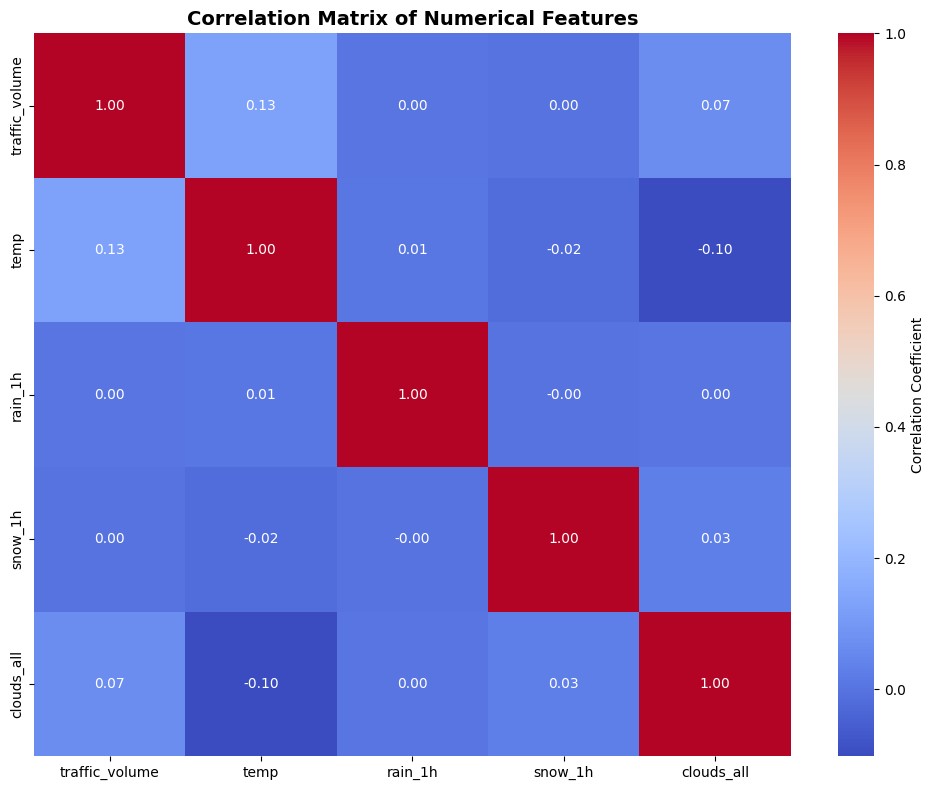

In [ ]:
# Select numerical columns
num_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']
corr_matrix = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### **Correlation Matrix and Heatmap**

**Observation and Interpretation:**

* The overall correlations between `traffic_volume` and weather-related features are **weak**, suggesting that weather has **limited direct influence** on traffic volume in this dataset.
* The correlation between `traffic_volume` and `temp` is slightly positive (**r = 0.13**), meaning that higher temperatures are weakly associated with increased traffic, possibly due to more outdoor activities or favorable driving conditions.
* Rain, snow, and cloudiness (`rain_1h`, `snow_1h`, `clouds_all`) show **near-zero correlations** with traffic volume, implying that these factors do not significantly affect the number of cars per hour in the dataset.
* The heatmap colors (ranging from blue for negative correlations to red for positive) provide a quick visual cue of the **strength and direction** of relationships between variables.

**Conclusion:**
*The correlation analysis confirms that weather conditions have minimal linear impact on hourly traffic volume, with temperature being the only variable showing a weak positive relationship.*

In [ ]:
import plotly.express as px

fig = px.scatter(
    df.sample(1000),  # Sample for performance
    x='temp',
    y='traffic_volume',
    color='weather_main',
    hover_name='date_time',
    hover_data=['weather_description'],
    title='Traffic Volume vs. Temperature by Weather Condition'
)
fig.update_layout(
    xaxis_title='Temperature (Kelvin)',
    yaxis_title='Traffic Volume (Cars/Hour)',
    title_font_size=18,
    template='plotly_white'
)
fig.show()

### **Relationship Between Traffic Volume and Temperature**

**Observations and Interpretation:**

* The plot shows a **slight upward trend** in traffic volume as temperature increases, indicating that **warmer conditions** may encourage more vehicle activity.
* However, the overall pattern is **widely dispersed**, confirming a **weak correlation** (as supported by the correlation matrix, *r ≈ 0.13*).
* Traffic volume remains relatively high across most weather types, but **clear** and **cloudy** conditions tend to show the **highest volumes**, while **snowy** and **foggy** conditions exhibit slightly lower traffic.
* The variation in points suggests that factors beyond temperature—such as time of day, holidays, or road infrastructure—also influence traffic behavior.

**Conclusion:**
*Temperature has a minor but noticeable effect on traffic volume, with warmer days showing higher average traffic. Weather conditions like “Clear” and “Clouds” appear more favorable for vehicle movement compared to extreme conditions such as “Snow” or “Fog.”*